<a href="https://colab.research.google.com/github/MarcosGutierrez97/03MIAR-Algoritmos-de-optimizaci-n/blob/main/spot2_data_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar datos
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spots = pd.read_csv('/content/drive/MyDrive/Spot2 Data Challenge/LK_SPOTS (3) (3).csv')
spots_analytics = pd.read_csv('/content/drive/MyDrive/Spot2 Data Challenge/LK_SPOTS_ANALYTICS (3) (3).csv')

In [3]:
spots.head()

,spot_id,spot_sector_id,spot_type_id,spot_settlement,spot_municipality,spot_state,spot_region,spot_corridor,spot_latitude,spot_longitude,spot_area_in_sqm,spot_price_sqm_mxn_rent,spot_price_total_mxn_rent,spot_price_sqm_mxn_sale,spot_price_total_mxn_sale,spot_modality,uuiid,spot_created_date
0,25564,13,2,POBLADO COMPUERTAS,Mexicali,Baja California,North,NaN,32.653423,-115.374076,6800,400.0,2720000.0,NaN,NaN,Rent,5,2024-02-29
1,28099,15,1,REAL DEL RIO,Mexicali,Baja California,North,NaN,32.647870,-115.532511,3637,100.0,363700.0,10000.0,36370000.0,Rent & Sale,13934,2024-07-04
2,27713,11,1,JARDINES DEL VALLE,Mexicali,Baja California,North,NaN,32.641716,-115.448483,50,400.0,20000.0,NaN,NaN,Rent,15584,2024-06-12
3,29738,9,1,CALLES,Mexicali,Baja California,North,NaN,32.631594,-115.383016,7795,120.0,935400.0,NaN,NaN,Rent,3388,2024-09-11
4,28102,9,2,TECNOLOGICO DE BAJA CALIFORNIA,Mexicali,Baja California,North,NaN,32.619531,-115.399344,2000,120.0,240000.0,NaN,NaN,Rent,13934,2024-07-04


In [5]:
spots["spot_created_at"] = pd.to_datetime(spots["spot_created_date"])
print(spots['spot_created_date'].min())
print(spots['spot_created_date'].max())

2024-01-02
2024-10-04


**Analisis exploratorio de spots**

In [6]:
print(spots.info())
print(spots.describe())
print(spots.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   spot_id                    2052 non-null   int64         
 1   spot_sector_id             2052 non-null   int64         
 2   spot_type_id               2052 non-null   int64         
 3   spot_settlement            2052 non-null   object        
 4   spot_municipality          2052 non-null   object        
 5   spot_state                 2052 non-null   object        
 6   spot_region                2052 non-null   object        
 7   spot_corridor              1083 non-null   object        
 8   spot_latitude              2052 non-null   float64       
 9   spot_longitude             2052 non-null   float64       
 10  spot_area_in_sqm           2052 non-null   int64         
 11  spot_price_sqm_mxn_rent    1683 non-null   float64       
 12  spot_p

In [7]:
spots.isna().sum()

,0
spot_id,0
spot_sector_id,0
spot_type_id,0
spot_settlement,0
spot_municipality,0
spot_state,0
spot_region,0
spot_corridor,969
spot_latitude,0
spot_longitude,0


spot_sector_id
11    919
13    512
9     441
15    180
Name: count, dtype: int64


<Axes: title={'center': 'Distribución de Spot Sector Id'}, xlabel='spot_sector_id'>

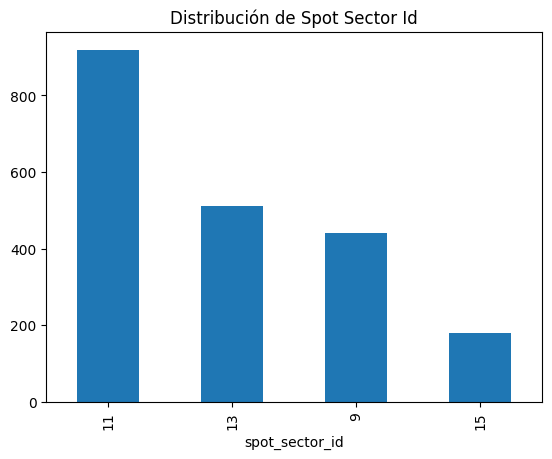

In [8]:
# Distribución de sectores
print(spots['spot_sector_id'].value_counts())
spots['spot_sector_id'].value_counts().plot(kind='bar', title='Distribución de Spot Sector Id')
#9 → Industrial
#11 → Office
#12 → Retail
#15 → Land


spot_type_id
2    1052
1    1000
Name: count, dtype: int64


<Axes: title={'center': 'Distribución de Spot Type Id'}, xlabel='spot_type_id'>

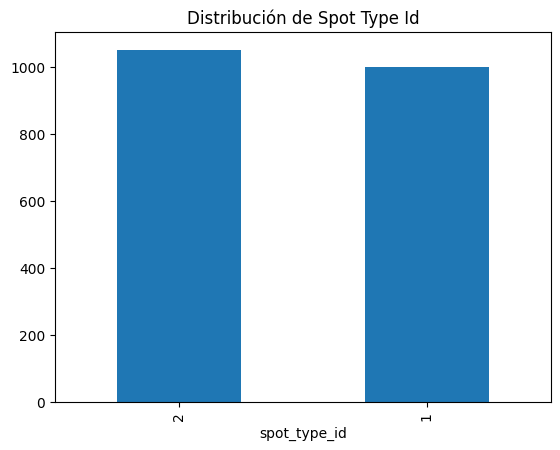

In [9]:
# Distribución de tipos
print(spots['spot_type_id'].value_counts())
spots['spot_type_id'].value_counts().plot(kind='bar', title='Distribución de Spot Type Id')

In [10]:
m = folium.Map(location=[spots['spot_latitude'].mean(), spots['spot_longitude'].mean()], zoom_start=10)

# Agregar puntos al mapa
for idx, row in spots.iterrows():
    folium.Marker(
        [row['spot_latitude'], row['spot_longitude']],
        popup=f"ID: {row['spot_id']}\nMunicipality: {row['spot_municipality']}\nState: {row['spot_state']}"
    ).add_to(m)

# Mostrar mapa
m

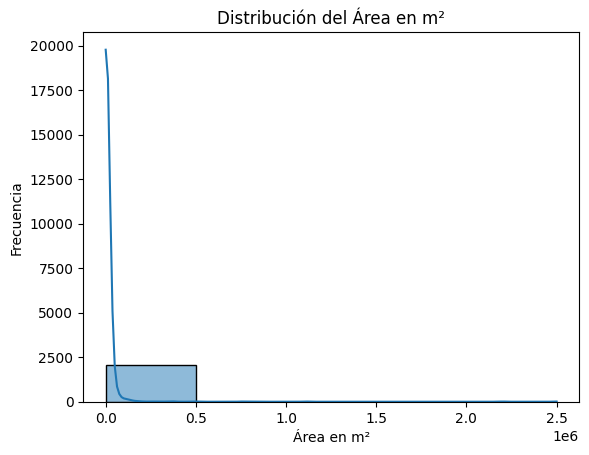

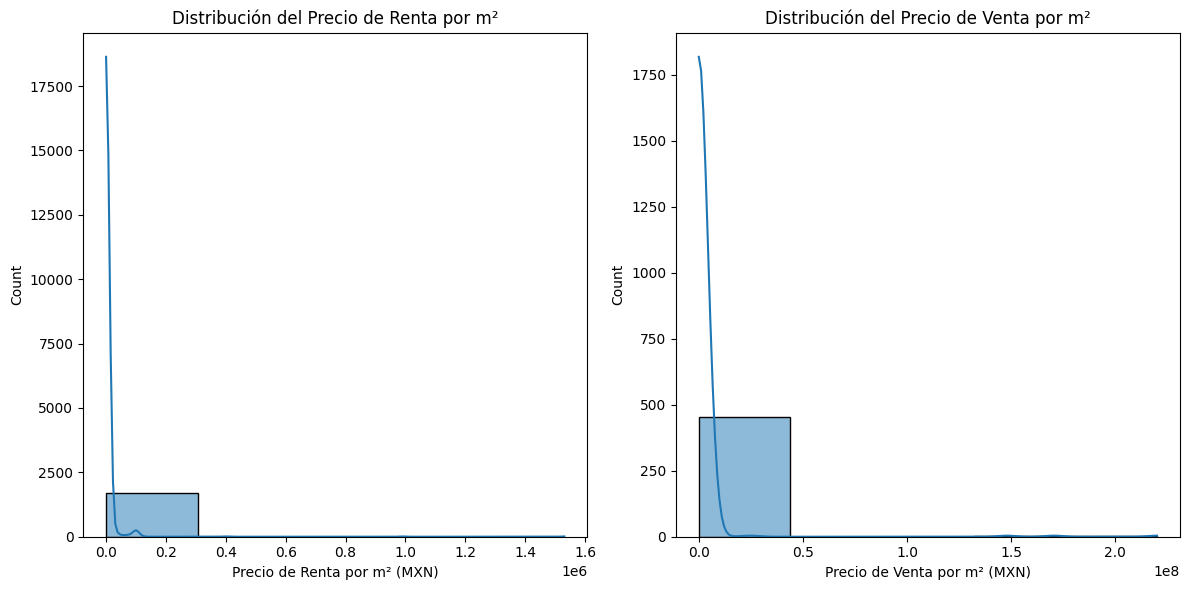

In [11]:
# Distribución de áreas en metros cuadrados
sns.histplot(spots['spot_area_in_sqm'], bins=5, kde=True)
plt.title("Distribución del Área en m²")
plt.xlabel("Área en m²")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de precios de renta y venta
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(spots['spot_price_sqm_mxn_rent'], bins=5, kde=True, ax=axes[0])
axes[0].set_title("Distribución del Precio de Renta por m²")
axes[0].set_xlabel("Precio de Renta por m² (MXN)")

sns.histplot(spots['spot_price_sqm_mxn_sale'], bins=5, kde=True, ax=axes[1])
axes[1].set_title("Distribución del Precio de Venta por m²")
axes[1].set_xlabel("Precio de Venta por m² (MXN)")

plt.tight_layout()
plt.show()

In [12]:
#Prueba de normalidad para precios de areas, renta y venta
from scipy.stats import shapiro

stat, p_value = shapiro(spots['spot_area_in_sqm'].dropna())
print(f"Shapiro-Wilk test: Estadístico={stat}, p-valor={p_value}")

if p_value > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los datos no siguen una distribución normal (se rechaza la hipótesis nula).")


Shapiro-Wilk test: Estadístico=0.08306468640284936, p-valor=1.1832173648302534e-71
Los datos no siguen una distribución normal (se rechaza la hipótesis nula).


In [13]:
stat, p_value = shapiro(spots['spot_price_sqm_mxn_sale'].dropna())
print(f"Shapiro-Wilk test: Estadístico={stat}, p-valor={p_value}")

if p_value > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los datos no siguen una distribución normal (se rechaza la hipótesis nula).")

Shapiro-Wilk test: Estadístico=0.06011358245135556, p-valor=2.8140785524998218e-42
Los datos no siguen una distribución normal (se rechaza la hipótesis nula).


In [14]:
stat, p_value = shapiro(spots['spot_price_sqm_mxn_rent'].dropna())
print(f"Shapiro-Wilk test: Estadístico={stat}, p-valor={p_value}")

if p_value > 0.05:
    print("Los datos parecen seguir una distribución normal (no se rechaza la hipótesis nula).")
else:
    print("Los datos no siguen una distribución normal (se rechaza la hipótesis nula).")

Shapiro-Wilk test: Estadístico=0.05129970547358742, p-valor=8.215292100028447e-68
Los datos no siguen una distribución normal (se rechaza la hipótesis nula).


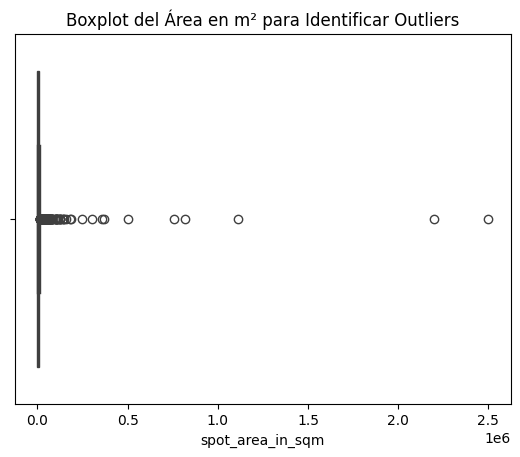

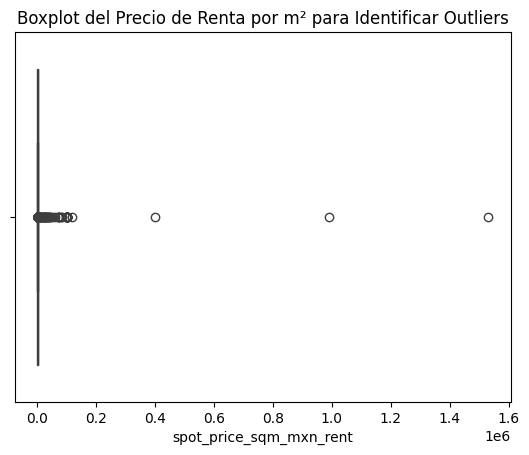

In [15]:
#Visualizacion de outliers
sns.boxplot(x=spots['spot_area_in_sqm'])
plt.title('Boxplot del Área en m² para Identificar Outliers')
plt.show()

sns.boxplot(x=spots['spot_price_sqm_mxn_rent'])
plt.title('Boxplot del Precio de Renta por m² para Identificar Outliers')
plt.show()

In [16]:
#Encontrar outliers en el dataset por area
# Cálculo de IQR
Q1 = spots['spot_area_in_sqm'].quantile(0.25)
Q3 = spots['spot_area_in_sqm'].quantile(0.75)
IQR = Q3 - Q1

# Determina los límites de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los outliers
outliers_area = spots[(spots['spot_area_in_sqm'] < lower_bound) | (spots['spot_area_in_sqm'] > upper_bound)]
#print("Outliers en la columna:", outliers_area)

In [17]:
outliers_area.head()

,spot_id,spot_sector_id,spot_type_id,spot_settlement,spot_municipality,spot_state,spot_region,spot_corridor,spot_latitude,spot_longitude,spot_area_in_sqm,spot_price_sqm_mxn_rent,spot_price_total_mxn_rent,spot_price_sqm_mxn_sale,spot_price_total_mxn_sale,spot_modality,uuiid,spot_created_date,spot_created_at
10,26586,9,2,GARITA DE OTAY,Tijuana,Baja California,North,NaN,32.546277,-116.945503,180000,NaN,NaN,3740.0,673200000.0,Sale,13430,2024-04-08,2024-04-08
27,29458,9,2,CAÑADAS DEL FLORIDO 2DA SECCION,Tijuana,Baja California,North,NaN,32.474346,-116.856432,20279,166.691332,3380333.518,NaN,NaN,Rent,16319,2024-09-04,2024-09-04
46,28958,11,2,15 DE ENERO,Juárez,Chihuahua,North,NaN,31.649923,-106.401216,30660,147.308619,4516482.252,NaN,NaN,Rent,16319,2024-08-20,2024-08-20
48,28956,11,2,CENTRO INDUSTRIAL JUAREZ 10,Juárez,Chihuahua,North,NaN,31.615916,-106.419089,35844,153.123433,5488556.322,NaN,NaN,Rent,16319,2024-08-20,2024-08-20
50,26534,9,2,SIN NOMBRE,Juárez,Chihuahua,North,NaN,31.606480,-106.447803,21500,155.061704,3333826.636,NaN,NaN,Rent,8650,2024-04-05,2024-04-05


In [18]:
#Encontrar outliers en el dataset por precio
# Cálculo de IQR
Q1 = spots['spot_price_sqm_mxn_rent'].quantile(0.25)
Q3 = spots['spot_price_sqm_mxn_rent'].quantile(0.75)
IQR = Q3 - Q1

# Determina los límites de los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtra los outliers
outliers_precio = spots[(spots['spot_price_sqm_mxn_rent'] < lower_bound) | (spots['spot_price_sqm_mxn_rent'] > upper_bound)]
#print("Outliers en la columna:", outliers_precio)

In [19]:
outliers_precio.head()

,spot_id,spot_sector_id,spot_type_id,spot_settlement,spot_municipality,spot_state,spot_region,spot_corridor,spot_latitude,spot_longitude,spot_area_in_sqm,spot_price_sqm_mxn_rent,spot_price_total_mxn_rent,spot_price_sqm_mxn_sale,spot_price_total_mxn_sale,spot_modality,uuiid,spot_created_date,spot_created_at
18,28623,13,1,MADERO,Tijuana,Baja California,North,NaN,32.521490,-117.024175,100,1000.0000,1.000000e+05,NaN,NaN,Rent,931,2024-07-26,2024-07-26
19,30218,13,2,BUENOS AIRES NORTE,Tijuana,Baja California,North,NaN,32.517133,-116.901340,280,71716.0381,2.008049e+07,NaN,NaN,Rent,17586,2024-09-24,2024-09-24
31,28918,13,2,PASEOS DEL VERGEL,Tijuana,Baja California,North,NaN,32.455251,-116.837244,100,1000.0000,1.000000e+05,NaN,NaN,Rent,931,2024-08-19,2024-08-19
32,29215,11,2,LEANDRO VALLE (LAS FLORES),Tijuana,Baja California,North,NaN,32.454479,-116.978240,5415,35558.0000,1.925466e+08,NaN,NaN,Rent,16319,2024-08-28,2024-08-28
58,29986,13,2,EL VERGEL,Chihuahua,Chihuahua,North,NaN,28.714956,-106.098177,483,10397.0000,5.021751e+06,NaN,NaN,Rent,16319,2024-09-16,2024-09-16


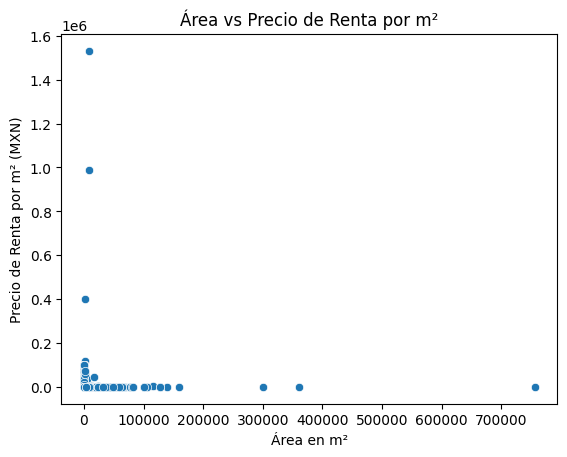

In [20]:
#Relacion entre precio y area
sns.scatterplot(data=spots, x='spot_area_in_sqm', y='spot_price_sqm_mxn_rent')
plt.title("Área vs Precio de Renta por m²")
plt.xlabel("Área en m²")
plt.ylabel("Precio de Renta por m² (MXN)")
plt.show()

In [21]:
# Realiza un merge para encontrar los spots que no están en los outliers
spots_sin_outliers = spots.merge(outliers_area, on='spot_id', how='left', indicator=True,suffixes=('', '_outlier_area'))
spots_sin_outliers = spots_sin_outliers[spots_sin_outliers['_merge'] == 'left_only'].drop(columns='_merge')

# Repetir para outliers_precio
spots_sin_outliers = spots_sin_outliers.merge(outliers_precio, on='spot_id', how='left', indicator=True,suffixes=('', '_outlier_precio'))
spots_sin_outliers = spots_sin_outliers[spots_sin_outliers['_merge'] == 'left_only'].drop(columns='_merge')

spots_sin_outliers = spots_sin_outliers[spots.columns]


In [22]:
spots_sin_outliers.head()

,spot_id,spot_sector_id,spot_type_id,spot_settlement,spot_municipality,spot_state,spot_region,spot_corridor,spot_latitude,spot_longitude,spot_area_in_sqm,spot_price_sqm_mxn_rent,spot_price_total_mxn_rent,spot_price_sqm_mxn_sale,spot_price_total_mxn_sale,spot_modality,uuiid,spot_created_date,spot_created_at
0,25564,13,2,POBLADO COMPUERTAS,Mexicali,Baja California,North,NaN,32.653423,-115.374076,6800,400.0,2720000.0,NaN,NaN,Rent,5,2024-02-29,2024-02-29
1,28099,15,1,REAL DEL RIO,Mexicali,Baja California,North,NaN,32.647870,-115.532511,3637,100.0,363700.0,10000.0,36370000.0,Rent & Sale,13934,2024-07-04,2024-07-04
2,27713,11,1,JARDINES DEL VALLE,Mexicali,Baja California,North,NaN,32.641716,-115.448483,50,400.0,20000.0,NaN,NaN,Rent,15584,2024-06-12,2024-06-12
3,29738,9,1,CALLES,Mexicali,Baja California,North,NaN,32.631594,-115.383016,7795,120.0,935400.0,NaN,NaN,Rent,3388,2024-09-11,2024-09-11
4,28102,9,2,TECNOLOGICO DE BAJA CALIFORNIA,Mexicali,Baja California,North,NaN,32.619531,-115.399344,2000,120.0,240000.0,NaN,NaN,Rent,13934,2024-07-04,2024-07-04


In [23]:
spots_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1603 entries, 0 to 1789
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   spot_id                    1603 non-null   int64         
 1   spot_sector_id             1603 non-null   int64         
 2   spot_type_id               1603 non-null   int64         
 3   spot_settlement            1603 non-null   object        
 4   spot_municipality          1603 non-null   object        
 5   spot_state                 1603 non-null   object        
 6   spot_region                1603 non-null   object        
 7   spot_corridor              849 non-null    object        
 8   spot_latitude              1603 non-null   float64       
 9   spot_longitude             1603 non-null   float64       
 10  spot_area_in_sqm           1603 non-null   int64         
 11  spot_price_sqm_mxn_rent    1293 non-null   float64       
 12  spot_price_

In [24]:
spots_sin_outliers.isnull().sum()

,0
spot_id,0
spot_sector_id,0
spot_type_id,0
spot_settlement,0
spot_municipality,0
spot_state,0
spot_region,0
spot_corridor,754
spot_latitude,0
spot_longitude,0


spot_sector_id
11    726
13    386
9     352
15    139
Name: count, dtype: int64


<Axes: title={'center': 'Distribución de Spot Sector Id'}, xlabel='spot_sector_id'>

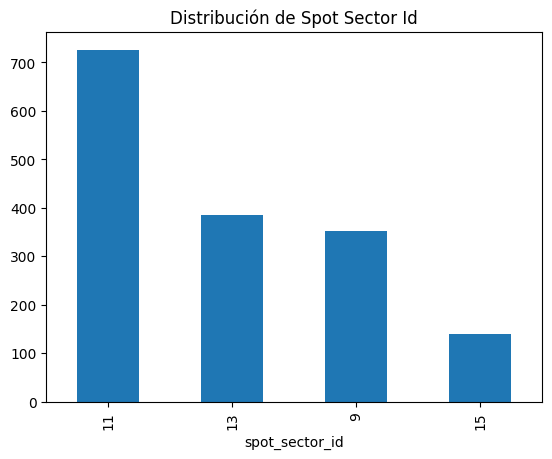

In [25]:
# Distribución de sectores
print(spots_sin_outliers['spot_sector_id'].value_counts())
spots_sin_outliers['spot_sector_id'].value_counts().plot(kind='bar', title='Distribución de Spot Sector Id')
#9 → Industrial
#11 → Office
#12 → Retail
#15 → Land

spot_type_id
1    885
2    718
Name: count, dtype: int64


<Axes: title={'center': 'Distribución de Spot Type Id'}, xlabel='spot_type_id'>

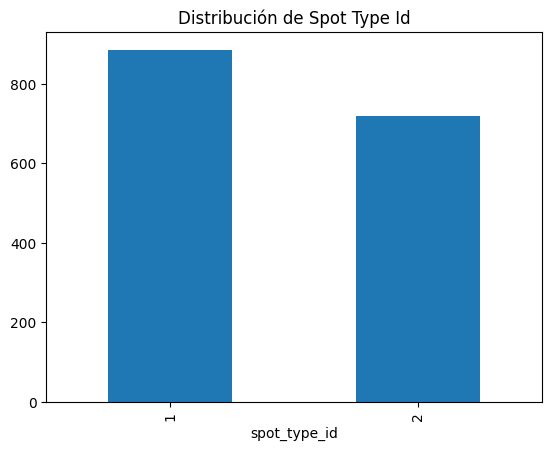

In [26]:
# Distribución de tipos
print(spots_sin_outliers['spot_type_id'].value_counts())
spots_sin_outliers['spot_type_id'].value_counts().plot(kind='bar', title='Distribución de Spot Type Id')

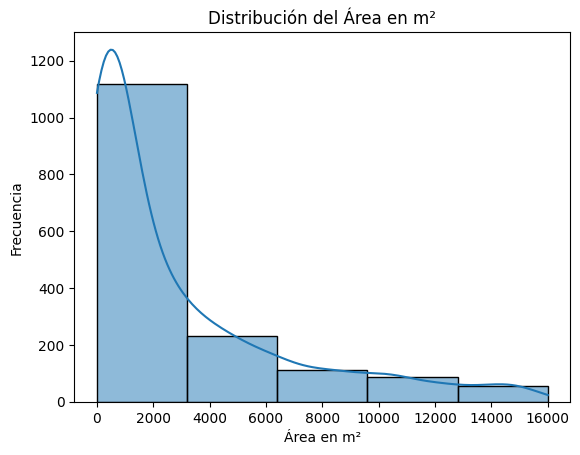

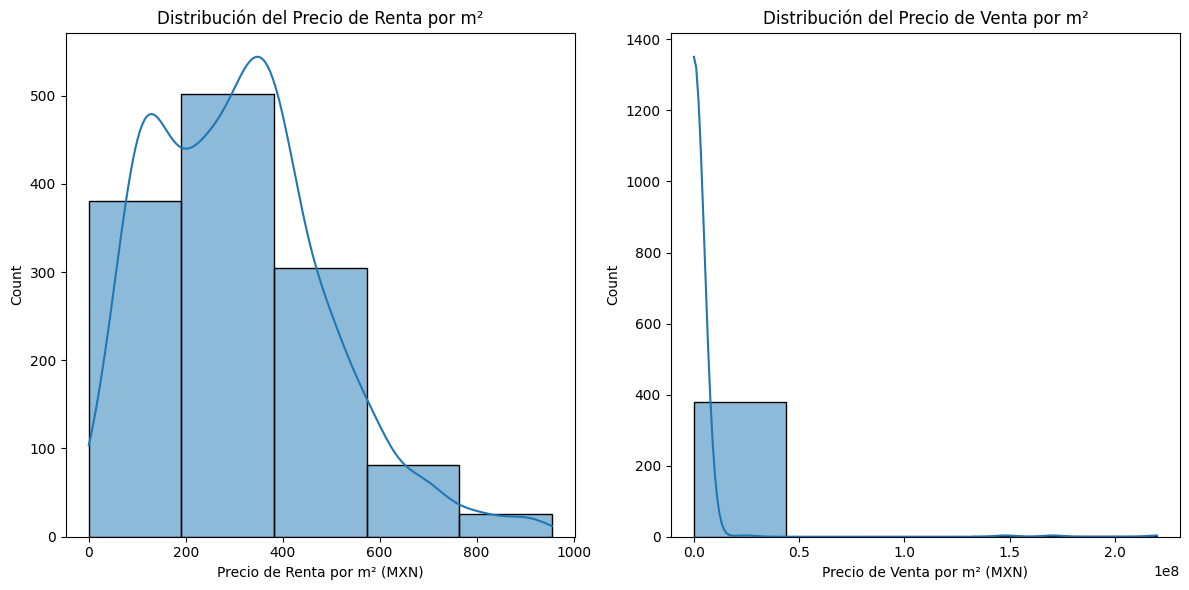

In [27]:
# Distribución de áreas en metros cuadrados
sns.histplot(spots_sin_outliers['spot_area_in_sqm'], bins=5, kde=True)
plt.title("Distribución del Área en m²")
plt.xlabel("Área en m²")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de precios de renta y venta
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(spots_sin_outliers['spot_price_sqm_mxn_rent'], bins=5, kde=True, ax=axes[0])
axes[0].set_title("Distribución del Precio de Renta por m²")
axes[0].set_xlabel("Precio de Renta por m² (MXN)")

sns.histplot(spots_sin_outliers['spot_price_sqm_mxn_sale'], bins=5, kde=True, ax=axes[1])
axes[1].set_title("Distribución del Precio de Venta por m²")
axes[1].set_xlabel("Precio de Venta por m² (MXN)")

plt.tight_layout()
plt.show()

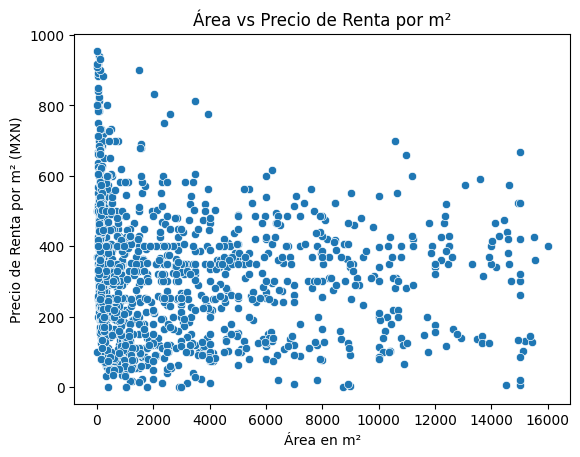

In [28]:
#Relacion entre precio y area
sns.scatterplot(data=spots_sin_outliers, x='spot_area_in_sqm', y='spot_price_sqm_mxn_rent')
plt.title("Área vs Precio de Renta por m²")
plt.xlabel("Área en m²")
plt.ylabel("Precio de Renta por m² (MXN)")
plt.show()

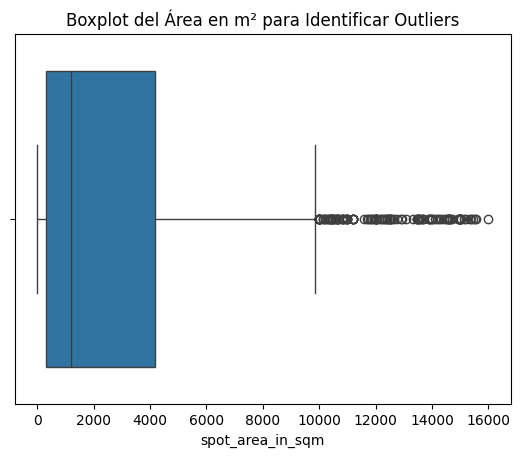

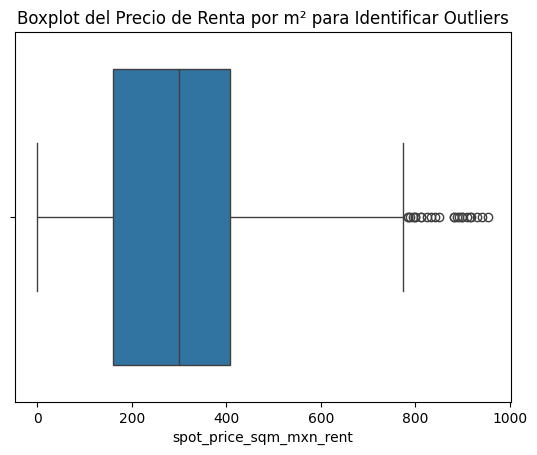

In [29]:
#Visualizacion de outliers
sns.boxplot(x=spots_sin_outliers['spot_area_in_sqm'])
plt.title('Boxplot del Área en m² para Identificar Outliers')
plt.show()

sns.boxplot(x=spots_sin_outliers['spot_price_sqm_mxn_rent'])
plt.title('Boxplot del Precio de Renta por m² para Identificar Outliers')
plt.show()

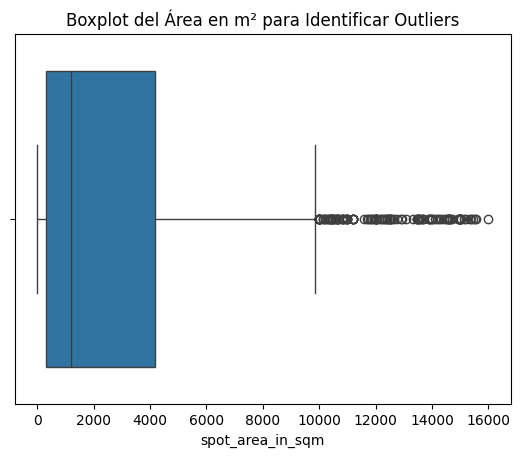

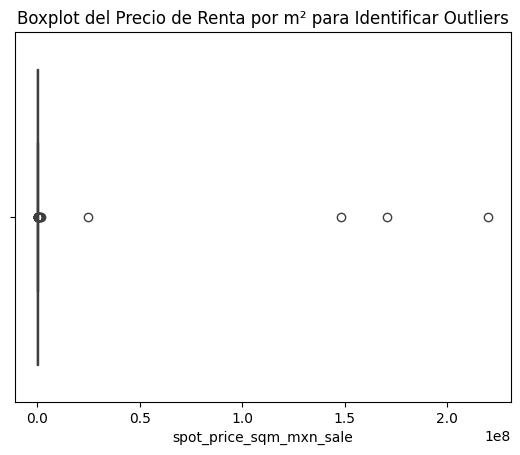

In [30]:
#Visualizacion de outliers
sns.boxplot(x=spots_sin_outliers['spot_area_in_sqm'])
plt.title('Boxplot del Área en m² para Identificar Outliers')
plt.show()

sns.boxplot(x=spots_sin_outliers['spot_price_sqm_mxn_sale'])
plt.title('Boxplot del Precio de Renta por m² para Identificar Outliers')
plt.show()

                spot_price_sqm_mxn_rent  spot_price_sqm_mxn_sale
spot_sector_id                                                  
9                            144.837313             7.704672e+06
11                           361.312213             2.753723e+05
13                           392.739181             7.356241e+04
15                            91.203701             2.857934e+04


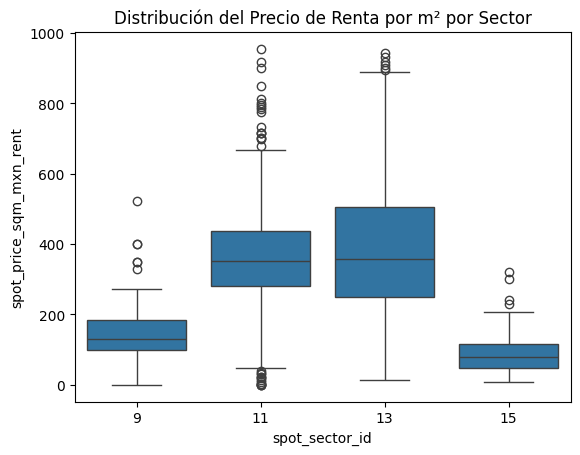

In [31]:
# Promedio de precio de renta y venta por sector
print(spots_sin_outliers.groupby('spot_sector_id')[['spot_price_sqm_mxn_rent', 'spot_price_sqm_mxn_sale']].mean())

# Boxplot de preciosSpot Price Sqm Mxn Rent' por sector
sns.boxplot(data=spots_sin_outliers, x='spot_sector_id', y='spot_price_sqm_mxn_rent')
plt.title("Distribución del Precio de Renta por m² por Sector")
plt.show()


              spot_price_sqm_mxn_rent  spot_price_sqm_mxn_sale
spot_type_id                                                  
1                          286.294278             2.108247e+06
2                          334.298313             8.428671e+04


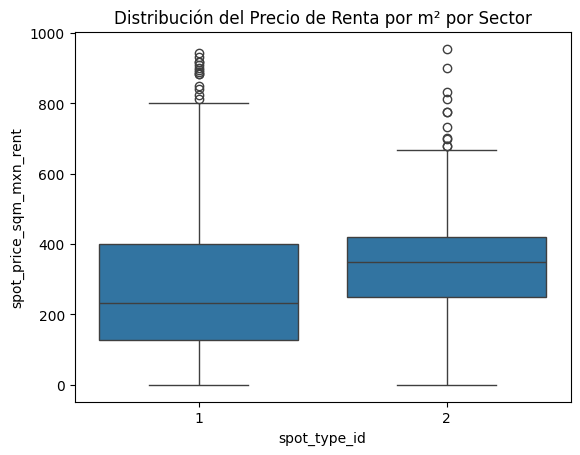

In [32]:
# Promedio de precio de renta y venta por sector
print(spots_sin_outliers.groupby('spot_type_id')[['spot_price_sqm_mxn_rent', 'spot_price_sqm_mxn_sale']].mean())

# Boxplot de preciosSpot Price Sqm Mxn Rent' por sector
sns.boxplot(data=spots_sin_outliers, x='spot_type_id', y='spot_price_sqm_mxn_rent')
plt.title("Distribución del Precio de Renta por m² por Sector")
plt.show()
#1 → Single
#2→ Complex


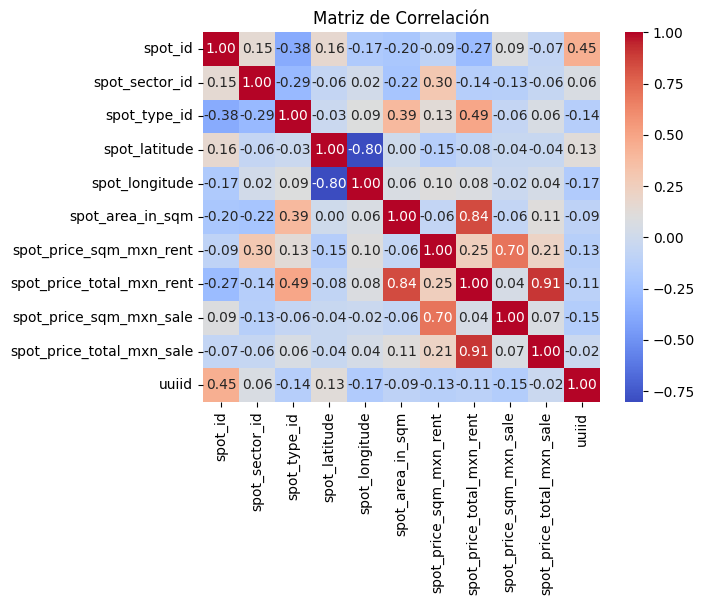

In [33]:
#Columnas numericas
numerical_cols = spots_sin_outliers.select_dtypes(include=np.number).columns

#Correlacion
corr_matrix = spots_sin_outliers[numerical_cols].corr()

# Mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [34]:
spots_analytics.head()

,spot_id,searched,first_event_searched,last_event_searched,Viewed,first_event_viewed,last_event_viewed,Interested,first_event_insterested,last_event_insterested
0,30796,31,2024-10-04 9:38:22,2024-10-04 10:11:48,7,2024-10-04 9:37:30,2024-10-04 9:43:22,NaN,NaN,NaN
1,30783,25,2024-10-04 7:47:17,2024-10-04 10:11:28,13,2024-10-04 7:46:19,2024-10-04 7:55:01,NaN,NaN,NaN
2,30780,53,2024-10-03 18:47:02,2024-10-04 10:11:22,1,2024-10-03 18:43:52,2024-10-03 18:43:52,NaN,NaN,NaN
3,30779,56,2024-10-03 18:43:27,2024-10-04 10:11:22,1,2024-10-03 18:40:58,2024-10-03 18:40:58,NaN,NaN,NaN
4,30778,54,2024-10-03 18:43:27,2024-10-04 10:11:22,1,2024-10-03 18:38:07,2024-10-03 18:38:07,NaN,NaN,NaN


In [35]:
spots_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spot_id                  2052 non-null   int64  
 1   searched                 2052 non-null   int64  
 2   first_event_searched     2052 non-null   object 
 3   last_event_searched      2052 non-null   object 
 4   Viewed                   2052 non-null   int64  
 5   first_event_viewed       2052 non-null   object 
 6   last_event_viewed        2052 non-null   object 
 7   Interested               639 non-null    float64
 8   first_event_insterested  639 non-null    float64
 9   last_event_insterested   639 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 160.4+ KB


In [36]:
#Merge de spots_sin_outliers y spots_analytics
spots_temp= pd.merge(spots_sin_outliers, spots_analytics, on="spot_id", how="left")

In [37]:
spots_temp.shape

(1603, 28)

In [38]:
spots_temp.isna().sum()

,0
spot_id,0
spot_sector_id,0
spot_type_id,0
spot_settlement,0
spot_municipality,0
spot_state,0
spot_region,0
spot_corridor,754
spot_latitude,0
spot_longitude,0


In [39]:
spots_temp.head()

,spot_id,spot_sector_id,spot_type_id,spot_settlement,spot_municipality,spot_state,spot_region,spot_corridor,spot_latitude,spot_longitude,...,spot_created_at,searched,first_event_searched,last_event_searched,Viewed,first_event_viewed,last_event_viewed,Interested,first_event_insterested,last_event_insterested
0,25564,13,2,POBLADO COMPUERTAS,Mexicali,Baja California,North,NaN,32.653423,-115.374076,...,2024-02-29,90,2024-02-29 11:30:20,2024-10-04 9:46:12,51,2024-02-29 11:29:24,2024-10-02 18:45:39,1.0,45563.77569,45563.77569
1,28099,15,1,REAL DEL RIO,Mexicali,Baja California,North,NaN,32.647870,-115.532511,...,2024-07-04,81,2024-07-04 22:39:12,2024-10-04 9:46:12,58,2024-07-04 22:20:37,2024-10-04 9:48:08,1.0,45555.33463,45555.33463
2,27713,11,1,JARDINES DEL VALLE,Mexicali,Baja California,North,NaN,32.641716,-115.448483,...,2024-06-12,26,2024-06-12 13:19:51,2024-09-17 20:53:55,2,2024-06-12 13:19:36,2024-09-10 1:08:08,NaN,NaN,NaN
3,29738,9,1,CALLES,Mexicali,Baja California,North,NaN,32.631594,-115.383016,...,2024-09-11,1191,2024-09-11 18:56:38,2024-10-04 9:46:12,28,2024-09-18 12:17:04,2024-10-02 18:45:26,NaN,NaN,NaN
4,28102,9,2,TECNOLOGICO DE BAJA CALIFORNIA,Mexicali,Baja California,North,NaN,32.619531,-115.399344,...,2024-07-04,75,2024-07-05 8:44:06,2024-10-04 9:46:12,43,2024-07-04 22:34:41,2024-10-03 15:59:45,0.0,45486.96994,45486.96994


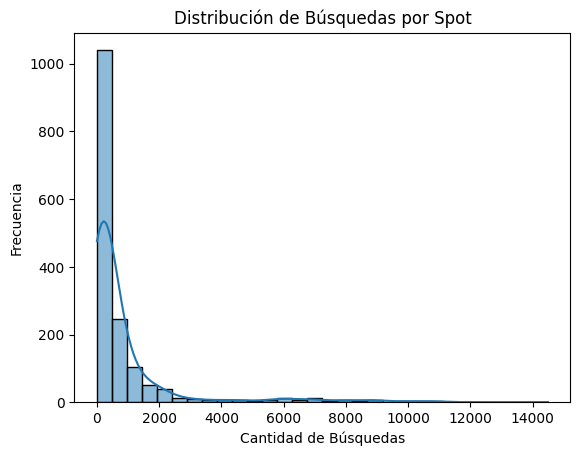

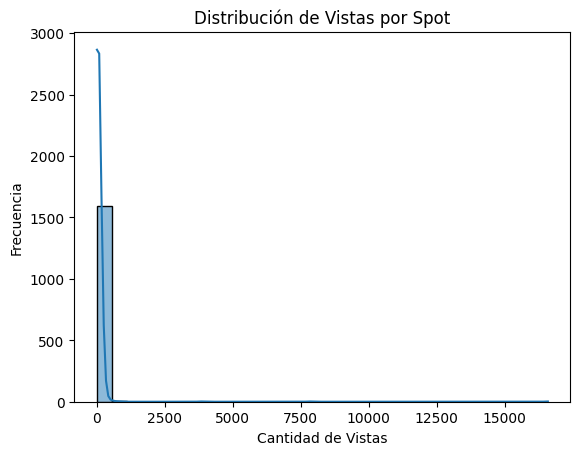

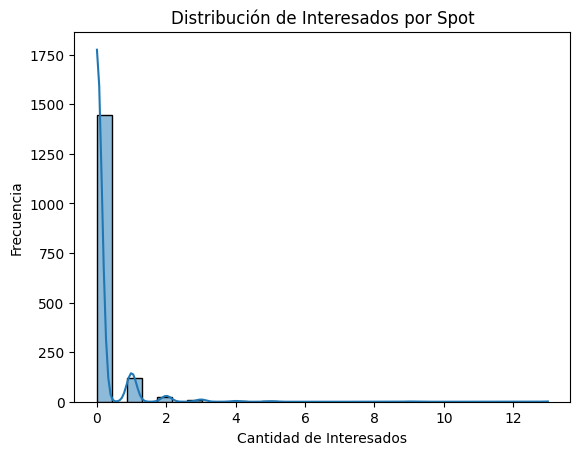

In [40]:
# Distribución de la cantidad de búsquedas
sns.histplot(spots_temp['searched'].fillna(0), bins=30, kde=True)
plt.title("Distribución de Búsquedas por Spot")
plt.xlabel("Cantidad de Búsquedas")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de la cantidad de vistas
sns.histplot(spots_temp['Viewed'].fillna(0), bins=30, kde=True)
plt.title("Distribución de Vistas por Spot")
plt.xlabel("Cantidad de Vistas")
plt.ylabel("Frecuencia")
plt.show()

# Distribución de la cantidad de interesados
sns.histplot(spots_temp['Interested'].fillna(0), bins=30, kde=True)
plt.title("Distribución de Interesados por Spot")
plt.xlabel("Cantidad de Interesados")
plt.ylabel("Frecuencia")
plt.show()

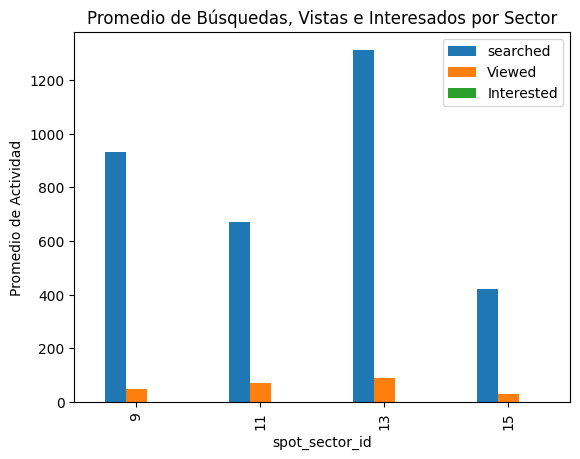

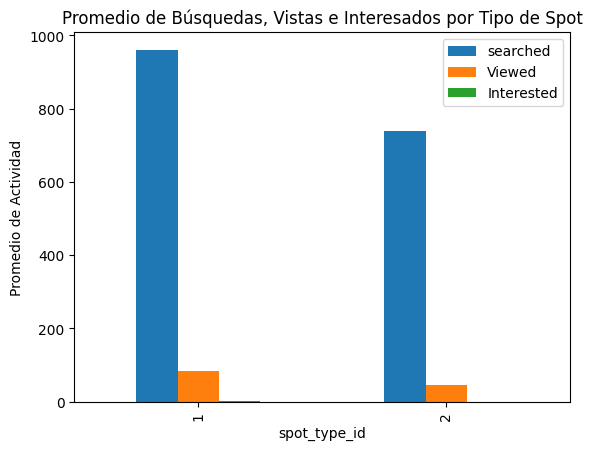

In [41]:
# Promedio de búsquedas, vistas e interesados por sector
spots_temp.groupby('spot_sector_id')[['searched', 'Viewed', 'Interested']].mean().plot(kind='bar')
plt.title("Promedio de Búsquedas, Vistas e Interesados por Sector")
plt.xlabel("spot_sector_id")
plt.ylabel("Promedio de Actividad")
plt.show()

# Promedio de búsquedas, vistas e interesados por tipo de spot
spots_temp.groupby(['spot_type_id'])[['searched', 'Viewed', 'Interested']].mean().plot(kind='bar')
plt.title("Promedio de Búsquedas, Vistas e Interesados por Tipo de Spot")
plt.xlabel('spot_type_id')
plt.ylabel("Promedio de Actividad")
plt.show()


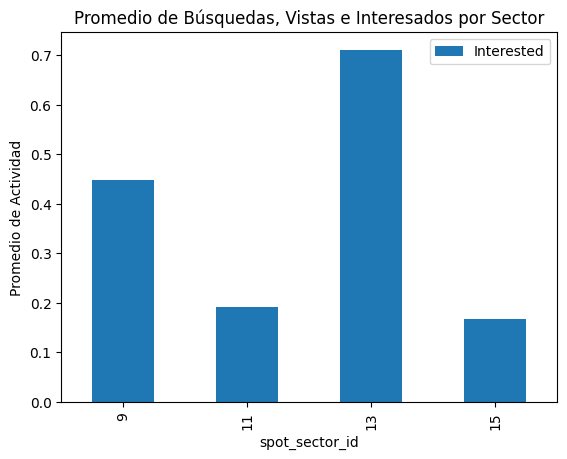

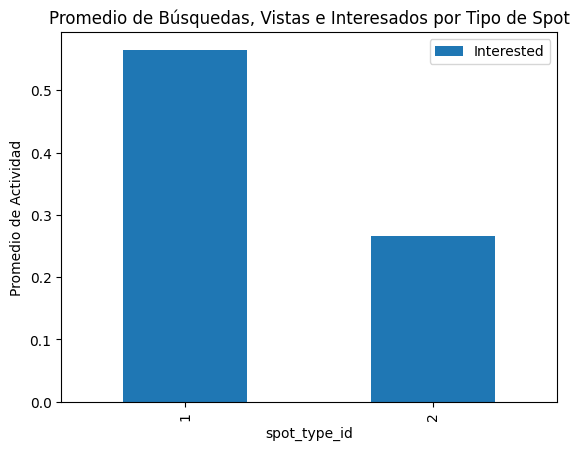

In [42]:
# Promedio de búsquedas, vistas e interesados por sector
spots_temp.groupby('spot_sector_id')[[ 'Interested']].mean().plot(kind='bar')
plt.title("Promedio de Búsquedas, Vistas e Interesados por Sector")
plt.xlabel("spot_sector_id")
plt.ylabel("Promedio de Actividad")
plt.show()

# Promedio de búsquedas, vistas e interesados por tipo de spot
spots_temp.groupby(['spot_type_id'])[['Interested']].mean().plot(kind='bar')
plt.title("Promedio de Búsquedas, Vistas e Interesados por Tipo de Spot")
plt.xlabel('spot_type_id')
plt.ylabel("Promedio de Actividad")
plt.show()

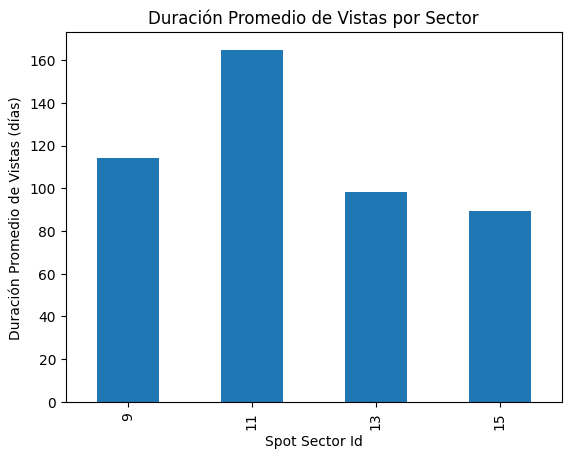

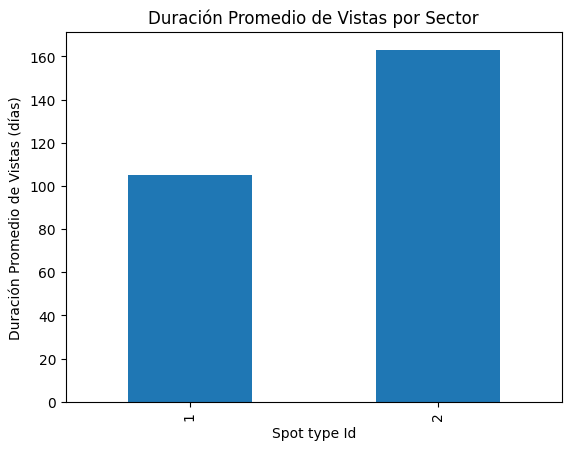

In [49]:
# Convertir columnas de fechas a formato datetime
date_columns = ['first_event_searched', 'last_event_searched', 'first_event_viewed', 'last_event_viewed', 'first_event_insterested', 'last_event_insterested']
for col in date_columns:
    spots_temp[col] = pd.to_datetime(spots_temp[col], errors='coerce')

# Ejemplo: calcular la duración de actividad en días (desde primera hasta última vista)
spots_temp['duration_viewed'] = (spots_temp['last_event_viewed'] - spots_temp['first_event_viewed']).dt.days
spots_temp['duration_searched'] = (spots_temp['last_event_searched'] - spots_temp['first_event_searched']).dt.days
spots_temp['duration_interested'] = (spots_temp['last_event_insterested'] - spots_temp['first_event_insterested']).dt.days

# Análisis de la duración promedio de vistas por sector
spots_temp.groupby('spot_sector_id')['duration_viewed'].mean().plot(kind='bar')
plt.title("Duración Promedio de Vistas por Sector")
plt.xlabel("Spot Sector Id")
plt.ylabel("Duración Promedio de Vistas (días)")
plt.show()


spots_temp.groupby('spot_type_id')['duration_viewed'].mean().plot(kind='bar')
plt.title("Duración Promedio de Vistas por Sector")
plt.xlabel("Spot type Id")
plt.ylabel("Duración Promedio de Vistas (días)")
plt.show()


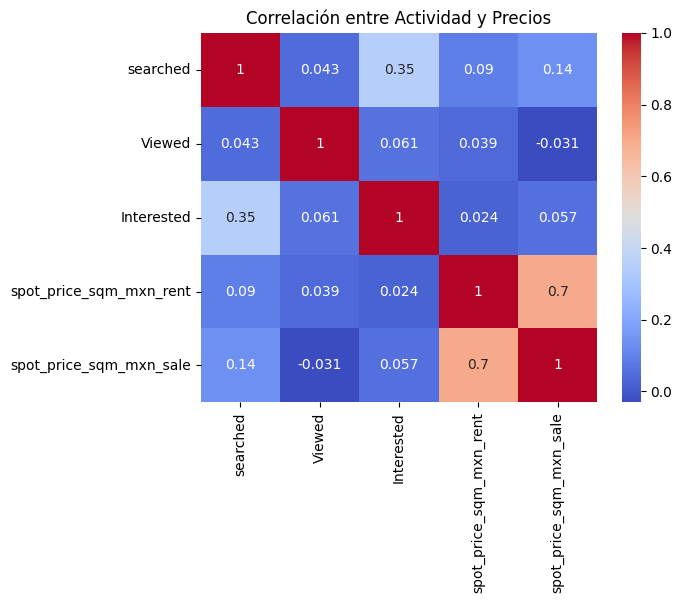

In [44]:
# Correlación entre variables de interés y precio de renta y venta
activity_price_corr = spots_temp[['searched', 'Viewed', 'Interested', 'spot_price_sqm_mxn_rent', 'spot_price_sqm_mxn_sale']].corr()
sns.heatmap(activity_price_corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre Actividad y Precios")
plt.show()


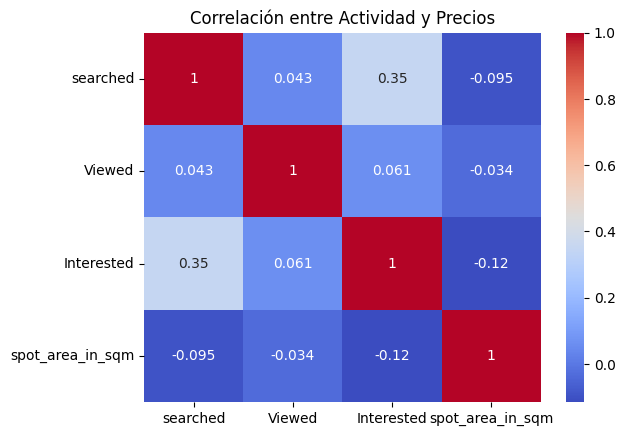

In [45]:
# Correlación entre variables de interés y precio de renta y venta
activity_price_corr = spots_temp[['searched', 'Viewed', 'Interested', 'spot_area_in_sqm']].corr()
sns.heatmap(activity_price_corr, annot=True, cmap='coolwarm')
plt.title("Correlación entre Actividad y Precios")
plt.show()


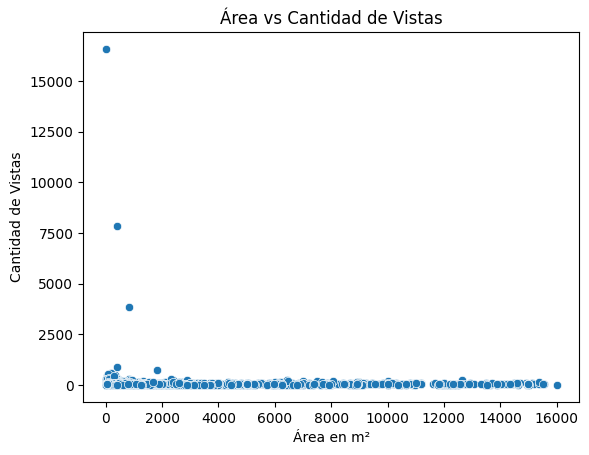

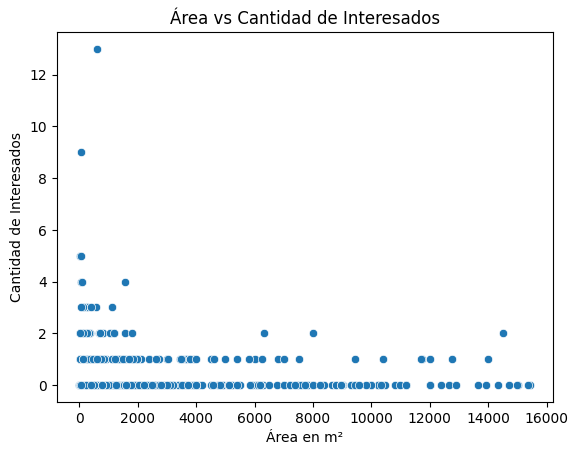

In [46]:
# Relación entre área del spot y cantidad de vistas
sns.scatterplot(data=spots_temp, x='spot_area_in_sqm', y='Viewed')
plt.title("Área vs Cantidad de Vistas")
plt.xlabel("Área en m²")
plt.ylabel("Cantidad de Vistas")
plt.show()

# Relación entre área del spot y cantidad de interesados
sns.scatterplot(data=spots_temp, x='spot_area_in_sqm', y='Interested')
plt.title("Área vs Cantidad de Interesados")
plt.xlabel("Área en m²")
plt.ylabel("Cantidad de Interesados")
plt.show()

In [47]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.8 MB/s eta 0:00:00


In [48]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from implicit.als import AlternatingLeastSquares

In [81]:
data = spots_temp[['searched', 'Viewed', 'Interested', 'spot_area_in_sqm','spot_price_sqm_mxn_rent','spot_id','spot_sector_id','spot_type_id','spot_']]
data["spot_area_in_sqm"].fillna(value=data["spot_area_in_sqm"].mean(), inplace=True)
data["spot_price_sqm_mxn_rent"].fillna(value=data["spot_price_sqm_mxn_rent"].mean(), inplace=True)

<ipython-input-81-b50792753a2d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["spot_area_in_sqm"].fillna(value=data["spot_area_in_sqm"].mean(), inplace=True)
<ipython-input-81-b50792753a2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["spot_area_in_sqm"].fillna(value=data["spot_area_in_sqm"].mean(), inplace=True)
<ipython-inpu

In [82]:
data["searched"].fillna(value=0, inplace=True)
data["Viewed"].fillna(value=0, inplace=True)
data["Interested"].fillna(value=0, inplace=True)

<ipython-input-82-ad8262c224b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["searched"].fillna(value=0, inplace=True)
<ipython-input-82-ad8262c224b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["searched"].fillna(value=0, inplace=True)
<ipython-input-82-ad8262c224b8>:2: FutureWarning: A value is trying to be set on a copy o

In [83]:
data['spot_area_in_sqm_norm'] = (data['spot_area_in_sqm']-data['spot_area_in_sqm'].mean())/data['spot_area_in_sqm'].std()
data['spot_price_sqm_mxn_rent_norm'] = (data['spot_price_sqm_mxn_rent']-data['spot_price_sqm_mxn_rent'].mean())/data['spot_price_sqm_mxn_rent'].std()

<ipython-input-83-9f404ad87247>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spot_area_in_sqm_norm'] = (data['spot_area_in_sqm']-data['spot_area_in_sqm'].mean())/data['spot_area_in_sqm'].std()
<ipython-input-83-9f404ad87247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['spot_price_sqm_mxn_rent_norm'] = (data['spot_price_sqm_mxn_rent']-data['spot_price_sqm_mxn_rent'].mean())/data['spot_price_sqm_mxn_rent'].std()


In [84]:
#Matriz de caracteristicas
matrix_features = data[['spot_area_in_sqm_norm','spot_price_sqm_mxn_rent_norm','spot_type_id','spot_sector_id']].values
content_similarity = cosine_similarity(matrix_features)

In [85]:
#Matriz de interaccion
interaction_matrix = csr_matrix(data[['Interested','Viewed','searched']].values).T
als_model = AlternatingLeastSquares(factors=10, iterations=10)
als_model.fit(interaction_matrix)

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.00027751922607421875 seconds
  warnings.warn(


  0%|          | 0/10 [00:00<?, ?it/s]

In [88]:
def recommend_properties(spot_id, num_recommendations=10, alpha=0.5):
    # Content-based recommendations (based on similarity)
    content_recs = content_similarity[spot_id - 1]  # Adjust for zero-index
    content_indices = np.argsort(content_recs)[-num_recommendations - 1:-1][::-1]  # Top matches excluding self

    # Collaborative filtering recommendations
    # Get the last user ID in the interaction matrix.
    #  Assume interaction_matrix has the shape (number of interactions, number of users).
    #  Therefore, interaction_matrix.shape[1] - 1 will give you the index of the last user.
    user_id = interaction_matrix.shape[1] - 1
    # Ensure user_id is within the valid range of user_factors.
    user_id = min(user_id, als_model.user_factors.shape[0] - 1)

    # Get the user's interaction data
    user_items = interaction_matrix.T[user_id]
    user_items = user_items.reshape(1, -1)  # Reshape to (1, num_items) to represent a single user's interactions

    # Get the recommendations using ALS model
    cf_scores = als_model.recommend(user_id, user_items, N=num_recommendations, filter_items=[spot_id - 1])  # ALS recommends item indices
    cf_indices = [rec[0] for rec in cf_scores]

    # Combine content-based and collaborative filtering recommendations
    combined_recs = list(set(content_indices).union(cf_indices))[:num_recommendations]

    # Return specified columns for the recommended properties
    return data.iloc[combined_recs][['spot_area_in_sqm', 'spot_price_sqm_mxn_rent', 'spot_type_id', 'spot_sector_id','spot_id']].values.tolist()

In [89]:
recommend_properties(spot_id = 1600)

[[445.0, 78.65168539, 1.0, 9.0, 28833.0],
 [3637.0, 100.0, 1.0, 15.0, 28099.0],
 [5400.0, 200.0, 1.0, 9.0, 29724.0],
 [250.0, 80.0, 1.0, 9.0, 27190.0],
 [650.0, 80.0, 1.0, 9.0, 29418.0],
 [350.0, 84.28571429, 1.0, 9.0, 28460.0],
 [472.0, 84.74576271, 1.0, 9.0, 27896.0],
 [300.0, 70.0, 1.0, 9.0, 26227.0],
 [420.0, 60.0, 1.0, 9.0, 26028.0],
 [244.0, 80.0, 1.0, 9.0, 26757.0]]